# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url for api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
#build partial query URL
query_url = url + "&appid=" + weather_api_key

#create lists for try/except loop
city = []
country =[]
latitude = []
longitude = []
temperature = []
humidity = []
clouds = []
wind = []

#loop through, using try/except to print out list or skip if no city
print("-----------------------------------------------------")
print("beginning Data Retrieval")
print("-----------------------------------------------------")

for x in range(len(cities)):
    try:
        response = requests.get(query_url + "&q=" + cities[x]).json()
        city.append(response['name'])
        country.append(response['sys']['country'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing City {x + 1} | {cities[x]}")
    except KeyError:
        print(f"Data missing for {cities[x]}, skipping...")
print("-----------------------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------------------")

-----------------------------------------------------
beginning Data Retrieval
-----------------------------------------------------
Processing City 1 | yambio
Processing City 2 | yellowknife
Processing City 3 | bluff
Processing City 4 | cape town
Processing City 5 | port elizabeth
Processing City 6 | vila franca do campo
Processing City 7 | hermanus
Data missing for taolanaro, skipping...
Processing City 9 | alice springs
Processing City 10 | puerto ayora
Processing City 11 | kahului
Processing City 12 | sisimiut
Processing City 13 | busselton
Processing City 14 | punta arenas
Processing City 15 | talcahuano
Processing City 16 | chintamani
Processing City 17 | kastamonu
Processing City 18 | zhigansk
Processing City 19 | pevek
Processing City 20 | nanortalik
Processing City 21 | aklavik
Processing City 22 | vaini
Processing City 23 | brooks
Processing City 24 | bethel
Processing City 25 | alofi
Processing City 26 | katsuura
Processing City 27 | oranjemund
Processing City 28 | rikitea
P

Processing City 255 | iqaluit
Processing City 256 | khani
Processing City 257 | rovaniemi
Processing City 258 | hobart
Processing City 259 | rorvik
Processing City 260 | hammerfest
Processing City 261 | hambantota
Processing City 262 | los llanos de aridane
Processing City 263 | sioux lookout
Data missing for sentyabrskiy, skipping...
Processing City 265 | luderitz
Processing City 266 | sinnamary
Processing City 267 | chipinge
Processing City 268 | dakar
Processing City 269 | dingle
Processing City 270 | souillac
Processing City 271 | bambous virieux
Processing City 272 | chinhoyi
Processing City 273 | mount isa
Data missing for houlung, skipping...
Processing City 275 | esperance
Processing City 276 | miraflores
Processing City 277 | akdepe
Processing City 278 | shenzhen
Processing City 279 | darhan
Processing City 280 | hasaki
Processing City 281 | tuktoyaktuk
Processing City 282 | barrow
Processing City 283 | chuy
Processing City 284 | darnah
Processing City 285 | porto novo
Data mi

Processing City 512 | worland
Processing City 513 | sorland
Processing City 514 | artigas
Processing City 515 | conceicao do araguaia
Processing City 516 | skjold
Processing City 517 | krasnoselkup
Processing City 518 | jiangyou
Processing City 519 | provideniya
Processing City 520 | scarborough
Processing City 521 | santiago de cuba
Processing City 522 | puerto madero
Processing City 523 | zarubino
Processing City 524 | wellington
Processing City 525 | belmonte
Processing City 526 | lesnoy
Processing City 527 | juneau
Processing City 528 | pativilca
Data missing for bolungarvik, skipping...
Processing City 530 | kantunilkin
Processing City 531 | moose factory
Processing City 532 | berezovyy
Processing City 533 | requena
Processing City 534 | santa rosalia
Processing City 535 | pijijiapan
Data missing for dolbeau, skipping...
Processing City 537 | liverpool
Processing City 538 | todos santos
Processing City 539 | quatre cocos
Processing City 540 | pallasovka
Data missing for kuhestan, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#convert city data into DataFrame

city_df = pd.DataFrame({"City": city,
                        "Country": country,
                       "Lat": latitude,
                       "Lng": longitude,
                       "Max Temp": temperature,
                       "Humidity": humidity,
                       "Cloudiness":clouds,
                       "Wind Speed": wind})
city_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yambio,SS,4.5721,28.3955,73.08,77,73,3.11
1,Yellowknife,CA,62.4560,-114.3525,26.15,80,20,2.30
2,Bluff,NZ,-46.6000,168.3333,52.00,90,88,7.00
3,Cape Town,ZA,-33.9258,18.4232,68.05,49,0,6.91
4,Port Elizabeth,ZA,-33.9180,25.5701,66.20,72,0,14.97
...,...,...,...,...,...,...,...,...
565,Daura,NG,11.5538,11.4085,95.25,7,94,3.94
566,Salinas,US,36.6777,-121.6555,52.97,76,90,3.44
567,Burla,IN,21.5000,83.8667,85.87,24,12,3.06
568,Moyale,KE,3.5167,39.0584,71.26,73,60,3.67


In [5]:
#use .describe() to see max humidity levels (if max is 100 or less then we don't have  to do next step)
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,20.738481,13.381950,60.106877,66.675439,54.533333,8.119193
std,33.146679,92.153436,22.511321,22.670985,37.876821,5.127987
min,-54.800000,-179.166700,-21.100000,3.000000,0.000000,0.310000
25%,-6.957975,-70.281850,47.657500,54.000000,20.000000,4.492500
50%,25.187450,17.494150,63.000000,71.000000,65.500000,6.910000
75%,48.606925,97.440425,78.800000,84.000000,90.000000,10.870000
max,78.218600,178.416700,104.900000,100.000000,100.000000,36.240000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#double checking humidity to be sure
humidity_df = city_df.loc[city_df["Humidity"] > 100]

humidity_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


In [7]:
#  Get the indices of cities that have humidity over 100%.

# there are no cities with a humidity over 100

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


clean_city_data = city_df
clean_city_data

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yambio,SS,4.5721,28.3955,73.08,77,73,3.11
1,Yellowknife,CA,62.4560,-114.3525,26.15,80,20,2.30
2,Bluff,NZ,-46.6000,168.3333,52.00,90,88,7.00
3,Cape Town,ZA,-33.9258,18.4232,68.05,49,0,6.91
4,Port Elizabeth,ZA,-33.9180,25.5701,66.20,72,0,14.97
...,...,...,...,...,...,...,...,...
565,Daura,NG,11.5538,11.4085,95.25,7,94,3.94
566,Salinas,US,36.6777,-121.6555,52.97,76,90,3.44
567,Burla,IN,21.5000,83.8667,85.87,24,12,3.06
568,Moyale,KE,3.5167,39.0584,71.26,73,60,3.67


In [9]:
#create output for clean city data so that it is output as a CSV for part two
clean_city_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

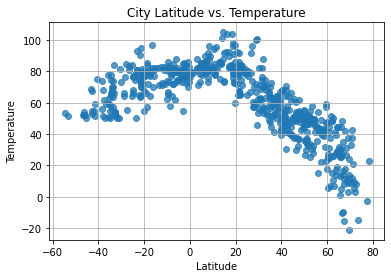

In [10]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

plt.scatter(x_values,y_values, alpha = .75)
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.savefig("../output/figures/latvstemp.png")

#The code above plots weather temps vs latitude. We know that a latitude of 0 is the equator.
#Assuming we have data from both the northern and southern hemisphere we should see an upside down U shape of the graph
#This shape is because we expect our latitude numbers to range from positive to negative with 0 in the middle, higher temperatures should group around the 0 and trail off the farther we awway we get from 0, causing the upside down U shape.

## Latitude vs. Humidity Plot

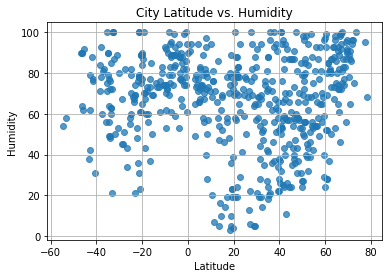

In [11]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

plt.scatter(x_values,y_values, alpha = .75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("../output/figures/latvshum.png")
#The code above compares latitude to humidity.
#This means it shows us the relative humidity level for each city in in a lat range.
#We can see from the graph that high levels of humidity exist accross latitudes, with lower levels occuring but less frequently.

## Latitude vs. Cloudiness Plot

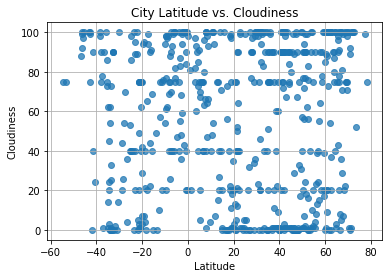

In [12]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

plt.scatter(x_values,y_values, alpha = .75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("../output/figures/latvscloud.png")
#The code above plots latitude vs cloudiness
#We can see from the chart that cloudiness is pretty level accross the board
#every latitude pretty much has every level of cloudiness until you get closer to the poles, this tells me maybe cloudiness is more related to a factor that is no latitude.

## Latitude vs. Wind Speed Plot

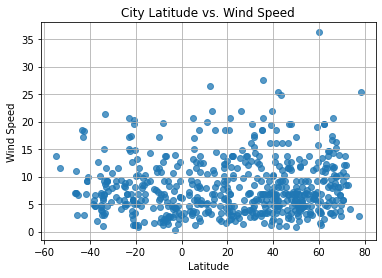

In [13]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

plt.scatter(x_values,y_values, alpha = .75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("../output/figures/latvswind.png")
#the code above compares latitude vs wind speed
#similar to cloudiness it looks like wind speed hold pretty consistant between 1mph and 20mph range accross all latitudes
# we do see some potential outliers above the 20mph mark.

## Linear Regression

In [14]:
city_nh = clean_city_data.loc[clean_city_data["Lat"]>=0]
city_sh = clean_city_data.loc[clean_city_data["Lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7713838118725681


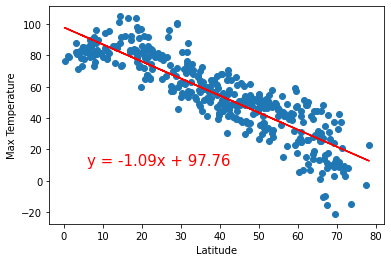

In [15]:
x_values = city_nh["Lat"]
y_values = city_nh["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output/figures/latvstempNH.png")

#We can see from the regression that there is a strong correlation between latitude and temperature in the northern hemisphere.
#As seen below, we start at 0 (Equator) and as we go farther and farther north (towards lat 80), the temperature drops. This is exactly what we would expecet to see.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.362441411875598


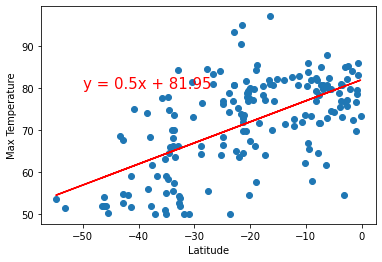

In [16]:
x_values = city_sh["Lat"]
y_values = city_sh["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output/figures/latvstempSH.png")
#We see similar results in the southern hemisphere, higher temps at the equator and it gets colder the farther south we go.
#The only other thing we see here is that the correlation is weaker than it was for the northern hemisphere, meaning we see slightly more sparatic temperatures in the southern hemisphere.
#It is possible this correlation difference is related to sample size, it looks like we pulled less cities in the southern hemisphere in our random data set.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.038947176981354616


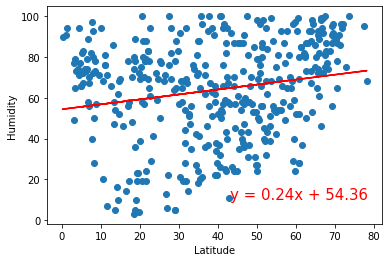

In [17]:
x_values = city_nh["Lat"]
y_values = city_nh["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(43,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output/figures/latvshumNH.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05740259787496628


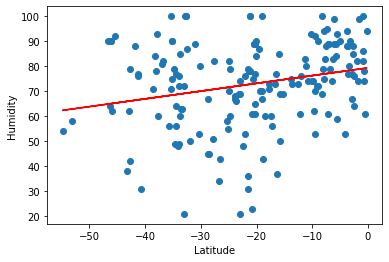

In [18]:
x_values = city_sh["Lat"]
y_values = city_sh["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output/figures/latvshumSH.png")
#the regressions for humidity vs latitude show us that the correlation between humidity and latitude are much weaker than temp vs lat.
#Even though this is true we once again see a much stronger correlation in the northern hemisphere than we do in the southern hemisphere.
#In fact the correlation in the southern hemishere is almost non existent as shown by our .009 r squared value.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0014676392162741012


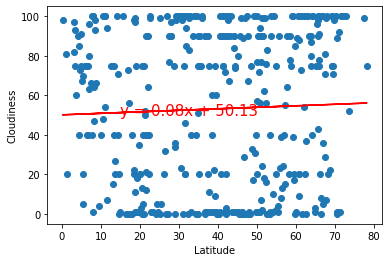

In [19]:
x_values = city_nh["Lat"]
y_values = city_nh["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output/figures/latvscloudNH.png")
#The set of graphs above

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010067921918986054


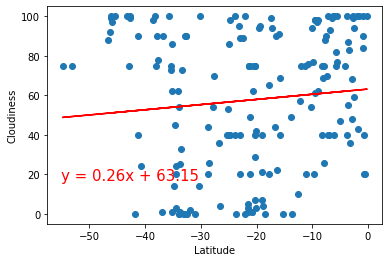

In [20]:
x_values = city_sh["Lat"]
y_values = city_sh["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output/figures/latvscloudNSH.png")
#Cloudiness vs lat is very similar to Humidty vs lat, the r-squared values are very similar for each regrssion. Telling us pretty much the same story.
#This does raise the question what are these values correlated to.
#I would want to see the correlation between humidity and cloudiness, my guess is there is a strong correlation there related more towards weather patterns and air currents than latitude, but at this point that is pure speculation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0009560447889006044


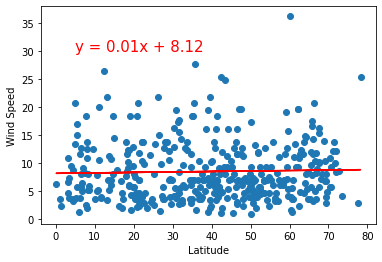

In [21]:
x_values = city_nh["Lat"]
y_values = city_nh["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output/figures/latvswindNH.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02932370583723049


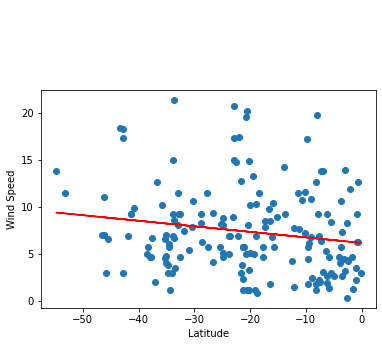

In [22]:
x_values = city_sh["Lat"]
y_values = city_sh["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output/figures/latvswindSH.png")
#the correlation from wind speed to latitude in the northern hemisphere is very weak, and it is only slightly stronger in the southern hemisphere.
#We can see from the southern hemisphere graph that wind speed does tend to trend up the farther away we get from the equator.
#Since these are latitudes for cities, I wonder if the correlation would look different accross longitudes outside of an urban area, say over the ocean?